In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Agente viajero

## Generación de coordenadas

In [ ]:
def congruence_method(seed, a, c, m, n, normalized = True):
    """
        Función Generadora de pseudonúmeros aleatorios 
        por el método de Congruencia Lineal. 
        Entrada: seed, a, c, m, n, normalized.
        Salida: random_list
    """
    
    # Inicialización de pseudonúmeros aleatorios.
    random_list = list()
    
    # Iteración de n números.
    for _ in range(n):
        # Congruencia Lineal.
        x_i = (a * seed + c) % m
        random_value = x_i
        # Normalización.
        if normalized:
            random_value = random_value / m
        # Anexión de valores a lista de pseudonúmeros aleatorios.
        random_list.append(random_value)
        # Remplazo de semilla.
        seed = x_i
    
    # Retorno de lista de pseudonúmeros aleatorios.
    return random_list

In [ ]:
num_places = 10
seed_x = 1234
seed_y = 42

In [ ]:
a = 102938
c = 564738
m = 2 ** 32

In [ ]:
x = np.array(congruence_method(seed_x, a, c, m, num_places, True)) * 100
y = np.array(congruence_method(seed_y, a, c, m, num_places, True)) * 100
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [ ]:
points = np.concatenate((x, y), axis=1)
points

array([[ 2.97069154,  0.11381074],
       [97.05863441, 15.46295355],
       [21.72239604, 25.52575502],
       [60.01713234, 70.18299955],
       [43.58196366, 97.62076843],
       [40.18801856, 86.673383  ],
       [74.26752853, 84.71195507],
       [50.86518335, 79.24400377],
       [60.25699186, 19.27331495],
       [34.2413764 , 56.5075736 ]])

In [ ]:
labels = ['Ciudad {}'.format(i + 1) for i in range(num_places)]
labels

['Ciudad 1',
 'Ciudad 2',
 'Ciudad 3',
 'Ciudad 4',
 'Ciudad 5',
 'Ciudad 6',
 'Ciudad 7',
 'Ciudad 8',
 'Ciudad 9',
 'Ciudad 10']

In [ ]:
dict_points = {l: p for l, p in zip(labels, points)}
dict_points

{'Ciudad 1': array([2.97069154, 0.11381074]),
 'Ciudad 2': array([97.05863441, 15.46295355]),
 'Ciudad 3': array([21.72239604, 25.52575502]),
 'Ciudad 4': array([60.01713234, 70.18299955]),
 'Ciudad 5': array([43.58196366, 97.62076843]),
 'Ciudad 6': array([40.18801856, 86.673383  ]),
 'Ciudad 7': array([74.26752853, 84.71195507]),
 'Ciudad 8': array([50.86518335, 79.24400377]),
 'Ciudad 9': array([60.25699186, 19.27331495]),
 'Ciudad 10': array([34.2413764, 56.5075736])}

## Cálculo de distancias

In [ ]:
def dist_euc(point_1, point_2):
    return ((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2) ** 0.5

In [ ]:
dists = np.zeros((num_places, num_places))
for i, p in enumerate(points):
    for j, q in enumerate(points):
        dists[i][j] = dist_euc(p, q)

In [ ]:
dists

array([[  0.        ,  95.33172179,  31.5815347 ,  90.35478753,
        105.62614364,  94.22148895, 110.63491759,  92.49578258,
         60.40535412,  64.48342595],
       [ 95.33172179,   0.        ,  76.00532077,  66.07841032,
         98.02887769,  91.13282729,  72.90307757,  78.75187165,
         36.99837494,  75.03778208],
       [ 31.5815347 ,  76.00532077,   0.        ,  58.82819322,
         75.3361245 ,  63.87496867,  79.14541822,  61.11425612,
         39.0385461 ,  33.41553459],
       [ 90.35478753,  66.07841032,  58.82819322,   0.        ,
         31.98352592,  25.79004652,  20.35102799,  12.87866328,
         50.91024964,  29.17887711],
       [105.62614364,  98.02887769,  75.3361245 ,  31.98352592,
          0.        ,  11.46141837,  33.29025915,  19.76741683,
         80.10230978,  42.16089846],
       [ 94.22148895,  91.13282729,  63.87496867,  25.79004652,
         11.46141837,   0.        ,  34.13590777,  13.00759485,
         70.32448266,  30.74635929],
       [11

## Algoritmos de resolución

In [ ]:
# Calcular la distancia total dada una ruta
def calculate_total_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]
    
    return total_distance

In [ ]:
# Graficar todas las conexiones entre puntos
def plot_points_and_connect_complete(points, distances, labels=[], zoom_factor=1):
    plt.figure(figsize=(6 * zoom_factor, 4 * zoom_factor))

    x_values, y_values = zip(*points)
    plt.scatter(x_values, y_values, marker='o', color='blue', label='Ciudades')
    
    # Graficar puntos y lineas
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            x_values = [points[i][0], points[j][0]]
            y_values = [points[i][1], points[j][1]]
            plt.plot(x_values, y_values, color='gray', linestyle='--')
            midpoint_x = (points[i][0] + points[j][0]) / 2
            midpoint_y = (points[i][1] + points[j][1]) / 2
            plt.text(midpoint_x, midpoint_y, f'{distances[i, j]:.2f}', fontsize=10, color='red')

    # Agregar etiquetas a los puntos
    if len(labels) != 0:
        for label, (x, y) in zip(labels, points):
            plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Mapa de ciudades con relaciones')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Graficar el recorrido de la ruta generada
def plot_points_and_connect(points, distances, initial_point=[], labels=[], route_index=[], zoom_factor=1):
    plt.figure(figsize=(6 * zoom_factor, 4 * zoom_factor))

    x_values, y_values = zip(*points)
    plt.scatter(x_values, y_values, marker='o', color='blue', label='Ciudades')
    if len(initial_point) != 0:
        plt.scatter(initial_point[0], initial_point[1], marker='o', color='green', label='Ciudad inicial')
    
    # Conectar los puntos en el orden de aparición
    for i in range(len(points) - 1):
        x1, y1 = points[i]
        x2, y2 = points[i + 1]
        plt.annotate('', xy=(x2, y2), xytext=(x1, y1), arrowprops={'arrowstyle': '->', 'linewidth': 0.8}, color='gray')
        midpoint_x = (x1 + x2) / 2
        midpoint_y = (y1 + y2) / 2
        plt.text(midpoint_x, midpoint_y, f'{distances[route_index[i], route_index[i+1]]:.2f}', fontsize=10, color='red')

    # Conectar el último punto con el primero para formar un ciclo
    x1, y1 = points[-1]
    plt.annotate('', xy=(x2, y2), xytext=(x1, y1), arrowprops={'arrowstyle': '->', 'linewidth': 0.2}, color='gray')
    
    # Agregar etiquetas a los puntos
    if len(labels) != 0:
        for label, (x, y) in zip(labels, points):
            plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Mapa de ciudades')
    plt.legend()
    plt.grid(True)
    plt.show()


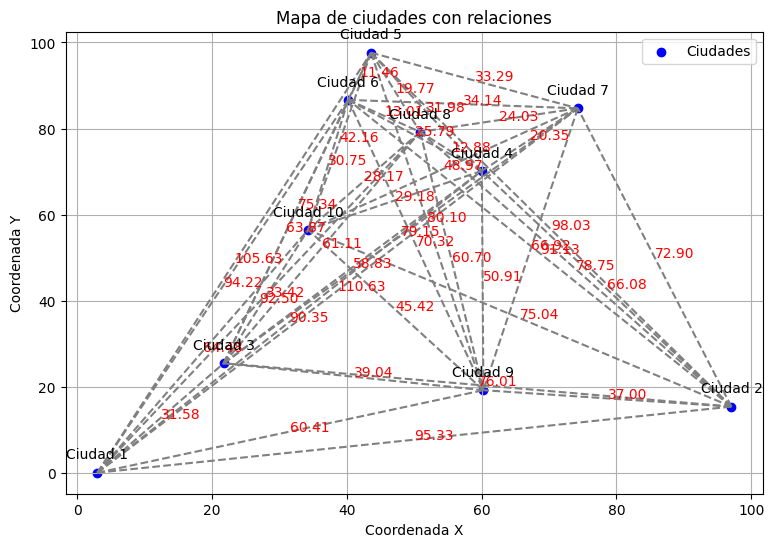

In [ ]:
plot_points_and_connect_complete(points, dists, labels, zoom_factor=1.5)

### Fuerza bruta

In [ ]:
# Implementación del algoritmo de fuerza bruta para TSP
def tsp_bruteforce(distances, start_point_index=0, labels=[]):
    n = len(distances)
    if len(labels) == 0:
        labels = ['City {}'.format(i + 1) for i in range(n)]
    cities = list(range(n))
    cities.remove(start_point_index)
    shortest_route = None
    shortest_distance = float('inf')

    # Se itera en todas las posibles permutaciones de ciudades omitiendo a la ciudad inicial
    for perm in itertools.permutations(cities):
        route = [start_point_index] + list(perm) + [start_point_index]
        distance = calculate_total_distance(route, distances)
        if distance < shortest_distance:
            shortest_distance = distance
            shortest_route = route
    shortest_route_labels = [labels[r] for r in shortest_route]

    return shortest_route, shortest_route_labels, shortest_distance

Mejor ruta: ['Ciudad 1', 'Ciudad 3', 'Ciudad 10', 'Ciudad 6', 'Ciudad 5', 'Ciudad 8', 'Ciudad 4', 'Ciudad 7', 'Ciudad 2', 'Ciudad 9', 'Ciudad 1']
Distancia total: 330.5087616748828


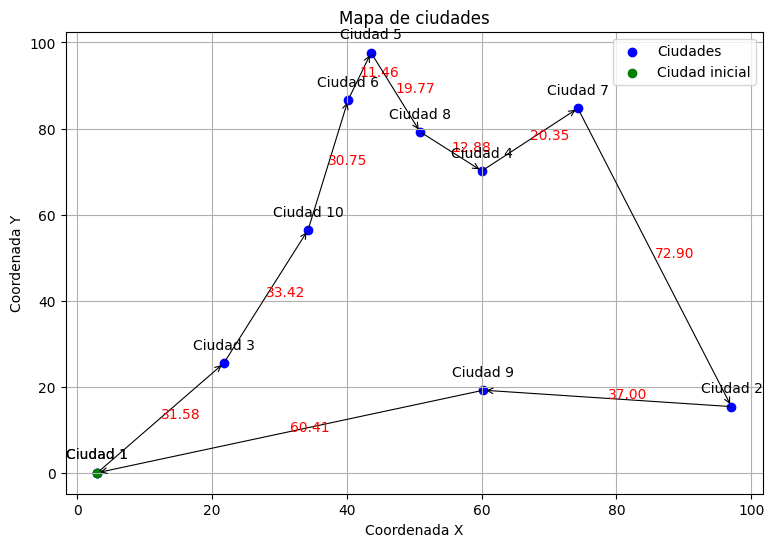

In [ ]:
start_point_index = 0
best_route_index, best_route, shortest_distance = tsp_bruteforce(dists, start_point_index, labels)
print("Mejor ruta:", best_route)
print("Distancia total:", shortest_distance)
points_best_route = [dict_points[city] for city in best_route]
plot_points_and_connect(points_best_route, dists, dict_points[labels[start_point_index]], best_route, best_route_index, 1.5)

### Vecino más cercano

In [ ]:
# Implementación de algoritmo vecinos más cercanos para TSP
def tsp_nearest_neighbor(distances, start_point_index=0, labels=[]):
    n = len(distances)
    if len(labels) == 0:
        labels = ['City {}'.format(i + 1) for i in range(n)]
    unvisited = set(range(n))
    unvisited.remove(start_point_index)
    route = [start_point_index]
    
    # Se recorre cada ciudad, seleccionando la más cercana y descartando las ya visitadas
    while unvisited:
        current_city = route[-1]
        nearest_city = min(unvisited, key=lambda city: distances[current_city][city])
        route.append(nearest_city)
        unvisited.remove(nearest_city)
    
    route.append(start_point_index)
    total_distance = calculate_total_distance(route, distances)
    route_labels = [labels[r] for r in route]
    
    return route, route_labels, total_distance

Mejor ruta: ['Ciudad 1', 'Ciudad 3', 'Ciudad 10', 'Ciudad 8', 'Ciudad 4', 'Ciudad 7', 'Ciudad 5', 'Ciudad 6', 'Ciudad 9', 'Ciudad 2', 'Ciudad 1']
Distancia total: 373.79853209997043


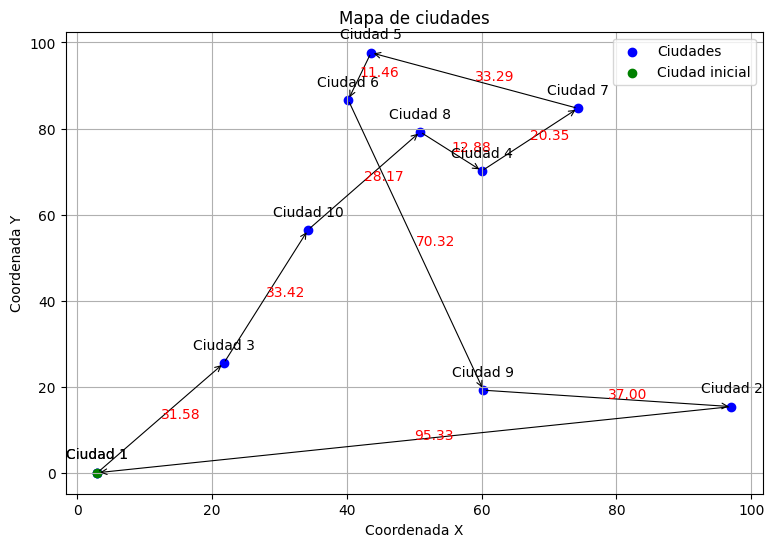

In [ ]:
start_point_index = 0
best_route_index, best_route, shortest_distance = tsp_nearest_neighbor(dists, start_point_index, labels)
print("Mejor ruta:", best_route)
print("Distancia total:", shortest_distance)
points_best_route = [dict_points[city] for city in best_route]
plot_points_and_connect(points_best_route, dists, dict_points[labels[start_point_index]], best_route, best_route_index, 1.5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7cf0bcc3-3158-4705-811e-5e3fa8228e46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>